In [2]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint

from config import wsapikey
from config import censuskey

In [3]:
#CookCo
cookco ='cookco_zips.csv'
census = 'census_data_chi_zips_age3.csv'
walkscore = 'chi_zip_scores.csv'


In [4]:
cookco_table= pd.read_csv(cookco)
census_table= pd.read_csv(census)
ws_table= pd.read_csv(walkscore, delimiter=",")

In [5]:
ws_table.head()

,Unnamed: 0,Unnamed: 0.1,zipcode,walkscore,transitscore,bikescore,ZIP,LAT,LNG
0,0,0,60601.0,95,100.0,84.0,60601,41.885310,-87.622116
1,1,1,60602.0,93,100.0,86.0,60602,41.883073,-87.629149
2,2,2,60603.0,98,100.0,87.0,60603,41.880188,-87.625509
3,3,3,60604.0,98,100.0,88.0,60604,41.878095,-87.628461
4,4,4,60605.0,71,91.0,91.0,60605,41.867566,-87.617228


In [6]:
cookco_table.head()

,Unnamed: 0,ZipCode,HousingUnits,Population,Households,Families,MedianAge,MedianHouseholdIncome,MedianHomeValue
0,0,60601,39837.0,69283.0,36483.0,11773.0,38.1,53846.0,291335.0
1,1,60602,11257.0,21344.0,10582.0,3906.0,34.1,82834.0,390663.0
2,2,60603,20121.0,49333.0,16940.0,11128.0,35.1,27447.0,193626.0
3,3,60605,6004.0,14354.0,5654.0,3515.0,36.5,48332.0,175132.0
4,4,60606,43988.0,71331.0,40641.0,10371.0,32.4,89069.0,436891.0


In [7]:
census_table.head()

,Zipcode,Area,Population,Population_ME,Median Age,Household Income,Per Capita Income,Income over $75K*,% of Pop Income $75+,Poverty Count,...,Pop 80-84 years,Pop 85 years plus,Pop 0-9,Pop 10-19,Pop 20-29,Pop 30-39,Pop 40-49,Pop 50-59,Pop 60-69,Pop 70+
0,60622,(Chicago),54467.0,1296.0,31.8,79085.0,50176.0,11417.0,0.21,8174.0,...,486.0,453.0,0.12,0.07,0.25,0.28,0.12,0.07,0.05,0.04
1,60642,(Chicago),19508.0,921.0,31.8,82404.0,52496.0,4686.0,0.24,2610.0,...,184.0,84.0,0.09,0.04,0.29,0.31,0.11,0.07,0.05,0.04
2,60647,(Chicago),88866.0,1937.0,31.4,61028.0,34232.0,11214.0,0.13,16760.0,...,476.0,534.0,0.13,0.10,0.23,0.23,0.13,0.09,0.06,0.04
3,60615,(Chicago),40257.0,1237.0,33.5,40587.0,34264.0,5237.0,0.13,10058.0,...,753.0,660.0,0.10,0.11,0.22,0.16,0.11,0.11,0.10,0.09
4,60608,(Chicago),78072.0,1725.0,31.6,37574.0,18539.0,3659.0,0.05,18671.0,...,707.0,838.0,0.12,0.12,0.23,0.18,0.12,0.11,0.07,0.06


In [8]:
merge_table1 = pd.merge(cookco_table, ws_table, left_on="ZipCode", 
                       right_on='zipcode', how='left')

merge_table1.head()

,Unnamed: 0_x,ZipCode,HousingUnits,Population,Households,Families,MedianAge,MedianHouseholdIncome,MedianHomeValue,Unnamed: 0_y,Unnamed: 0.1,zipcode,walkscore,transitscore,bikescore,ZIP,LAT,LNG
0,0,60601,39837.0,69283.0,36483.0,11773.0,38.1,53846.0,291335.0,0.0,0.0,60601.0,95.0,100.0,84.0,60601.0,41.885310,-87.622116
1,1,60602,11257.0,21344.0,10582.0,3906.0,34.1,82834.0,390663.0,1.0,1.0,60602.0,93.0,100.0,86.0,60602.0,41.883073,-87.629149
2,2,60603,20121.0,49333.0,16940.0,11128.0,35.1,27447.0,193626.0,2.0,2.0,60603.0,98.0,100.0,87.0,60603.0,41.880188,-87.625509
3,3,60605,6004.0,14354.0,5654.0,3515.0,36.5,48332.0,175132.0,4.0,4.0,60605.0,71.0,91.0,91.0,60605.0,41.867566,-87.617228
4,4,60606,43988.0,71331.0,40641.0,10371.0,32.4,89069.0,436891.0,5.0,5.0,60606.0,97.0,100.0,87.0,60606.0,41.882066,-87.637349


In [9]:
merge_table = pd.merge(merge_table1, census_table, left_on="ZipCode", 
                       right_on="Zipcode",how="left")

merge_table.head()

,Unnamed: 0_x,ZipCode,HousingUnits,Population_x,Households,Families,MedianAge,MedianHouseholdIncome,MedianHomeValue,Unnamed: 0_y,...,Pop 80-84 years,Pop 85 years plus,Pop 0-9,Pop 10-19,Pop 20-29,Pop 30-39,Pop 40-49,Pop 50-59,Pop 60-69,Pop 70+
0,0,60601,39837.0,69283.0,36483.0,11773.0,38.1,53846.0,291335.0,0.0,...,302.0,98.0,0.06,0.06,0.22,0.16,0.14,0.14,0.11,0.09
1,1,60602,11257.0,21344.0,10582.0,3906.0,34.1,82834.0,390663.0,1.0,...,4.0,0.0,0.06,0.13,0.36,0.19,0.15,0.09,0.01,0.01
2,2,60603,20121.0,49333.0,16940.0,11128.0,35.1,27447.0,193626.0,2.0,...,0.0,0.0,0.03,0.19,0.37,0.07,0.10,0.12,0.08,0.04
3,3,60605,6004.0,14354.0,5654.0,3515.0,36.5,48332.0,175132.0,4.0,...,128.0,18.0,0.07,0.10,0.24,0.25,0.13,0.10,0.08,0.05
4,4,60606,43988.0,71331.0,40641.0,10371.0,32.4,89069.0,436891.0,5.0,...,0.0,0.0,0.07,0.00,0.28,0.29,0.15,0.05,0.13,0.03


In [10]:
merge_table.to_csv("merged_data_st.csv")
print('done')

done


In [ ]:
merge_table.head(56)

In [24]:
merge_table.columns

Index(['Unnamed: 0_x', 'ZipCode', 'HousingUnits', 'Population_x', 'Households',
       'Families', 'MedianAge', 'MedianHouseholdIncome', 'MedianHomeValue',
       'Unnamed: 0_y', 'Unnamed: 0.1', 'zipcode', 'walkscore', 'transitscore',
       'bikescore', 'ZIP', 'LAT', 'LNG', 'Zipcode', 'Area', 'Population_y',
       'Population_ME', 'Median Age', 'Household Income', 'Per Capita Income',
       'Income over $75K*', '% of Pop Income $75+', 'Poverty Count',
       'Poverty Rate', 'Time to work (don't use)', 'Worked outside home',
       'Drive to work', 'Public transit to work', 'Biked to work',
       'Walked to work', 'Worked at home', 'Drive to work -%  total pop',
       'Public transit to work -%  total pop', 'Biked to work -% total pop',
       'Walked to work -% total pop', 'Worked at home  - % total pop',
       '% Transiting  to work (any form)', 'Drive to work - % commuters',
       'Public transit to work -% commuters', 'Biked to work - % commuters',
       'Walked to work - % 

In [ ]:
#del merge_table['Unnamed: 60']

In [25]:
merge_table.drop([54])

,Unnamed: 0_x,ZipCode,HousingUnits,Population_x,Households,Families,MedianAge,MedianHouseholdIncome,MedianHomeValue,Unnamed: 0_y,...,Pop 80-84 years,Pop 85 years plus,Pop 0-9,Pop 10-19,Pop 20-29,Pop 30-39,Pop 40-49,Pop 50-59,Pop 60-69,Pop 70+
0,0,60601,39837.0,69283.0,36483.0,11773.0,38.1,53846.0,291335.0,0.0,...,302.0,98.0,0.06,0.06,0.22,0.16,0.14,0.14,0.11,0.09
1,1,60602,11257.0,21344.0,10582.0,3906.0,34.1,82834.0,390663.0,1.0,...,4.0,0.0,0.06,0.13,0.36,0.19,0.15,0.09,0.01,0.01
2,2,60603,20121.0,49333.0,16940.0,11128.0,35.1,27447.0,193626.0,2.0,...,0.0,0.0,0.03,0.19,0.37,0.07,0.10,0.12,0.08,0.04
3,3,60605,6004.0,14354.0,5654.0,3515.0,36.5,48332.0,175132.0,4.0,...,128.0,18.0,0.07,0.10,0.24,0.25,0.13,0.10,0.08,0.05
4,4,60606,43988.0,71331.0,40641.0,10371.0,32.4,89069.0,436891.0,5.0,...,0.0,0.0,0.07,0.00,0.28,0.29,0.15,0.05,0.13,0.03
5,5,60607,30157.0,49068.0,27761.0,7520.0,33.1,77317.0,335808.0,6.0,...,268.0,67.0,0.08,0.09,0.31,0.26,0.11,0.07,0.04,0.03
6,6,60608,37817.0,66866.0,34686.0,10377.0,31.7,101853.0,607649.0,7.0,...,707.0,838.0,0.12,0.12,0.23,0.18,0.12,0.11,0.07,0.06
7,7,60609,816.0,709.0,447.0,142.0,24.4,97932.0,567623.0,8.0,...,782.0,490.0,0.16,0.15,0.17,0.15,0.12,0.12,0.08,0.06
8,8,60610,32173.0,62565.0,26369.0,15092.0,42.0,36520.0,165677.0,9.0,...,899.0,440.0,0.07,0.05,0.26,0.21,0.10,0.09,0.12,0.11
9,9,60611,13237.0,40990.0,12487.0,9694.0,34.9,65746.0,182489.0,10.0,...,739.0,790.0,0.04,0.03,0.22,0.22,0.09,0.14,0.13,0.13


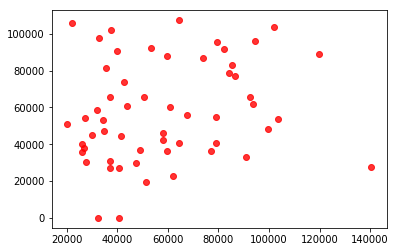

In [28]:
x_vals = merge_table["Household Income"]
y_vals = merge_table["MedianHouseholdIncome"]
plt.scatter(x_vals, y_vals, marker="o",color = "red", alpha=0.8)

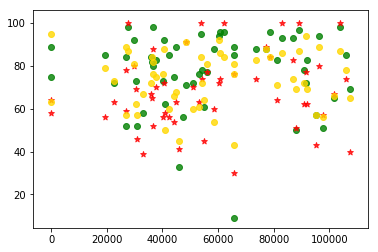

In [27]:
x1_vals = merge_table["MedianHouseholdIncome"]
y1_vals = merge_table["walkscore"]
plt.scatter(x1_vals, y1_vals, marker="o",color = "green", alpha=0.8)

x2_vals = merge_table["MedianHouseholdIncome"]
y2_vals = merge_table["transitscore"]
plt.scatter(x2_vals, y2_vals, marker="*",color = "red", alpha=0.8)


x3_vals = merge_table["MedianHouseholdIncome"]
y3_vals = merge_table["bikescore"]
plt.scatter(x3_vals, y3_vals, marker="o",color = "gold", alpha=0.8)



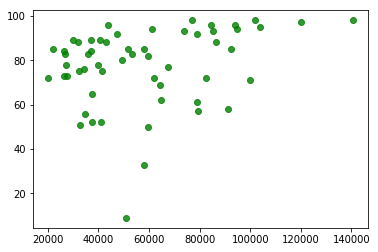

In [32]:
x1_vals = merge_table["Household Income"]
y1_vals = merge_table["walkscore"]
plt.scatter(x1_vals, y1_vals, marker="o",color = "green", alpha=0.8)

x2_vals = merge_table["Household Income"]
y2_vals = merge_table["transitscore"]
#plt.scatter(x2_vals, y2_vals, marker="*",color = "red", alpha=0.8)


x3_vals = merge_table["Household Income"]
y3_vals = merge_table["bikescore"]
#plt.scatter(x3_vals, y3_vals, marker="o",color = "gold", alpha=0.8)

In [ ]:
#merge_table["Walked to work"]= merge_table["Walked to work".astype("float") 

In [ ]:
tx_vals = merge_table["transitscore"]
ty_vals = merge_table["Public transit to work -% commuters"]
plt.scatter(tx_vals, ty_vals, marker="o",color = "#33CAC8", alpha=0.8)


#fox_x_vals = merge_table["Biked to work.1"]
#fox_y_vals = merge_table["bikescore"]
#plt.scatter(fox_x_vals, fox_y_vals, marker="o",color = "blue", alpha=0.8)
plt.xlabel("Transit score")
plt.ylabel("% Of commuters using public transit")
plt.title("Percent of Transit")



In [34]:
def quadratic_pol(x_axis,y_axis):
    degree = 2
    coeffs = np.polyfit(x_axis, y_axis,degree)
    quadratic, linear, intercept = coeffs
    fits = quadratic*(x_axis**2)+linear*x_axis+intercept
    residuals=y_axis-fits
    totals_err=y_axis-y_axis.mean()
    residuals_squared=residuals**2
    totals_err_squared=totals_err**2
    ss_res=residuals_squared.sum()
    ss_tot=totals_err_squared.sum()
    r_squared=1-ss_res/ss_tot
    return quadratic, linear, intercept, r_squared

def linear_pol(x_axis,y_axis):
    degree = 1
    coeffs = np.polyfit(x_axis, y_axis,degree)
    linear, intercept = coeffs
    fits = linear*x_axis+intercept
    residuals=y_axis-fits
    totals_err=y_axis-y_axis.mean()
    residuals_squared=residuals**2
    totals_err_squared=totals_err**2
    ss_res=residuals_squared.sum()
    ss_tot=totals_err_squared.sum()
    r_squared=1-ss_res/ss_tot
    return linear, intercept, r_squared

In [35]:
def scatter(df,x_axis,y_axis,title,x_label,y_label,color,intercept,linear,quadratic,r_squared):
    df=df.sort_values(x_axis, ascending=1)
    line = quadratic*df[x_axis]**2+linear*df[x_axis]+intercept
    min_loc=df[x_axis].min()
    max_loc=df[y_axis].max()
    plt.text(min_loc,max_loc,"R2 = " + str(round(r_squared,4)), fontsize=12,va="top")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(df[x_axis], df[y_axis], marker="o", color=color,s=50,zorder=1)
    plt.plot(df[x_axis],line,zorder=2,color="gray") 

In [36]:
def scatter_cell(df,x_axis,y_axis,color,degree):
    if degree==2:
        quadratic, linear, intercept, r_squared=quadratic_pol(df[x_axis], df[y_axis])
        scatter(df,x_axis,y_axis,x_axis+" vs "+ y_axis,x_axis,y_axis,color,intercept,linear,quadratic,r_squared)
    else:
        linear, intercept, r_squared=linear_pol(df[x_axis], df[y_axis])
        scatter(df,x_axis,y_axis,x_axis+" vs "+ y_axis,x_axis,y_axis,color,intercept,linear,0,r_squared)  

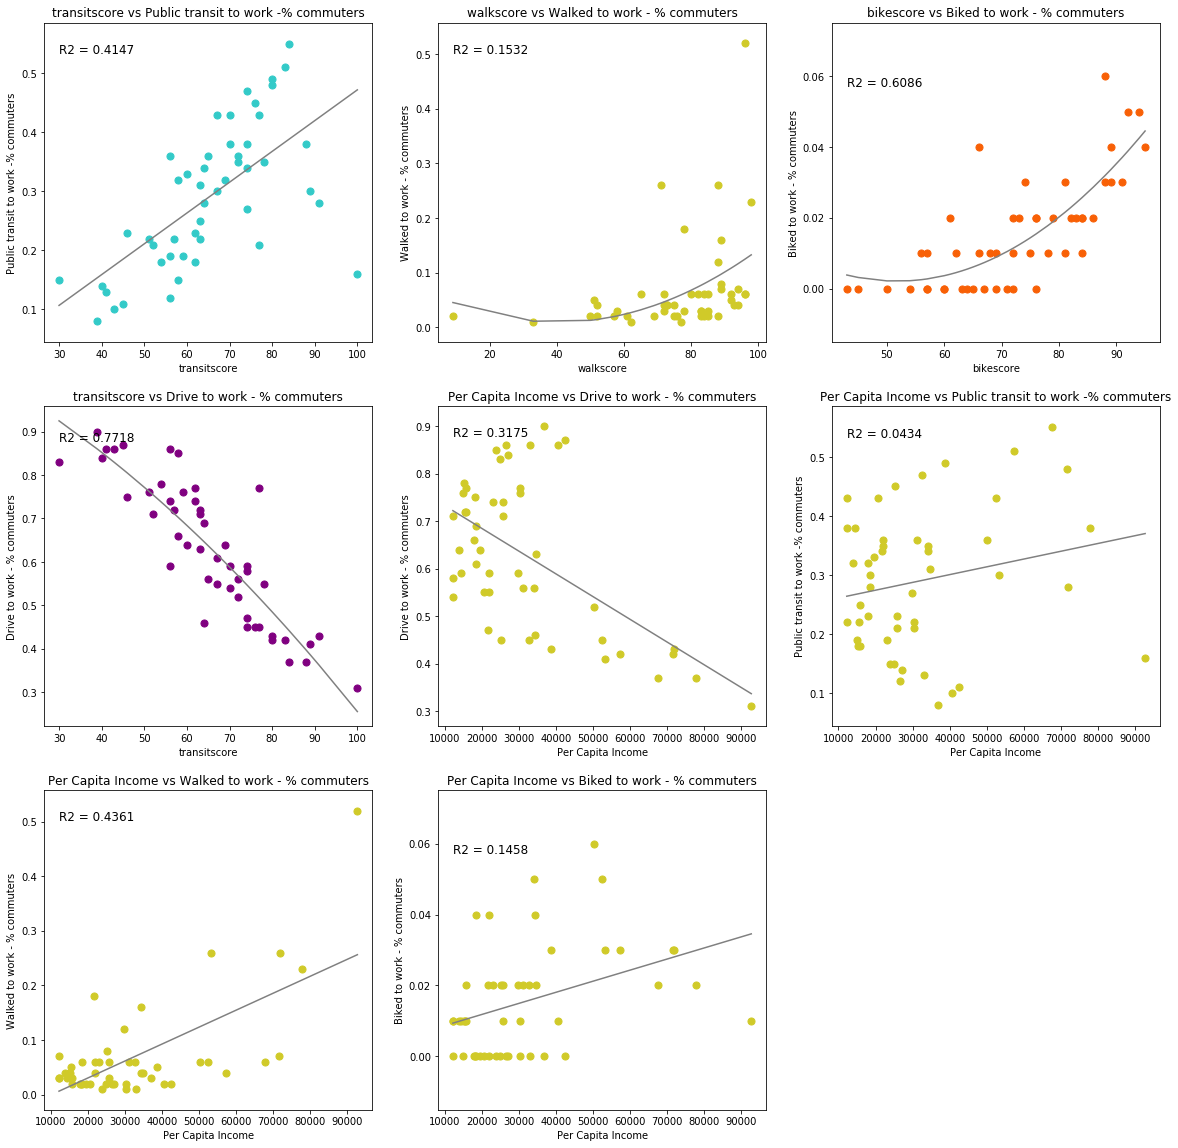

In [46]:
merge_table=merge_table.dropna()
plt.figure(figsize=(20,20))

plt.subplot(3, 3, 4)
scatter_cell(merge_table,'transitscore','Drive to work - % commuters',"purple",2)

plt.subplot(3, 3, 1)
scatter_cell(merge_table,'transitscore','Public transit to work -% commuters',"#33CAC8",1)

plt.subplot(3, 3, 2)
scatter_cell(merge_table,'walkscore','Walked to work - % commuters',"#D0CA29",2)

plt.subplot(3, 3, 3)
scatter_cell(merge_table,'bikescore','Biked to work - % commuters',"#F86006",2)

plt.subplot(3, 3, 5)
scatter_cell(merge_table,'Per Capita Income','Drive to work - % commuters',"#D0CA29",1)

plt.subplot(3, 3, 6)
scatter_cell(merge_table,'Per Capita Income','Public transit to work -% commuters',"#D0CA29",1)

plt.subplot(3, 3, 7)
scatter_cell(merge_table,'Per Capita Income', 'Walked to work - % commuters',"#D0CA29",1)

plt.subplot(3, 3, 8)
scatter_cell(merge_table,'Per Capita Income','Biked to work - % commuters',"#D0CA29",1)



#plt.subplot(3, 3, 6)
#scatter_cell(merge_table,'bikescore','Median Age',"#F86006",1)



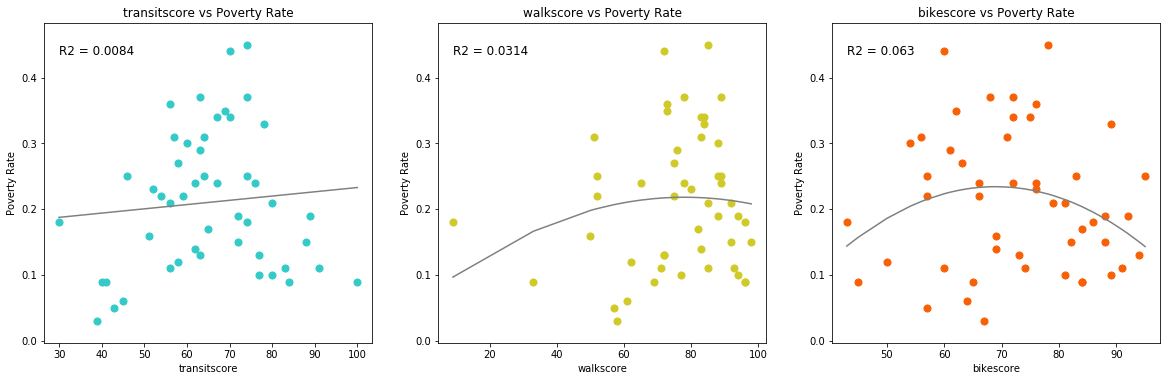

In [48]:
merge_table=merge_table.dropna()
plt.figure(figsize=(20,20))


plt.subplot(3, 3, 1)
scatter_cell(merge_table,'transitscore',"Poverty Rate", "#33CAC8",1)

plt.subplot(3, 3, 2)
scatter_cell(merge_table,'walkscore','Poverty Rate',"#D0CA29",2)

plt.subplot(3, 3, 3)
scatter_cell(merge_table,'bikescore','Poverty Rate',"#F86006",2)

In [ ]:
wx_vals = merge_table["walkscore"]
wy_vals = merge_table["Walked to work - % commuters"]
plt.scatter(wx_vals, wy_vals, marker="o",color = "#D0CA29", alpha=0.8)

In [ ]:
dx_vals = merge_table["transitscore"]
dy_vals = merge_table["Drive to work - % commuters"]
plt.scatter(dx_vals, dy_vals, marker="o",color = "purple", alpha=0.8)


In [ ]:
bx_vals = merge_table["Biked to work - % commuters"]
by_vals = merge_table["bikescore"]
plt.scatter(bx_vals, by_vals, marker="o",color = "blue", alpha=0.8)


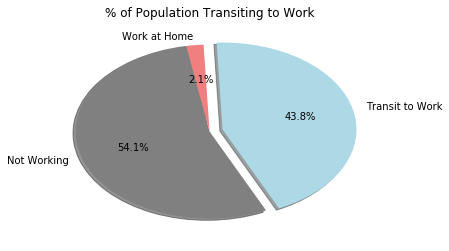

In [42]:
#Pie Plots
labels = ["Not Working", "Transit to Work", "Work at Home"]
sizes = [1468, 1187, 56]

# The colors of each section of the pie chart
colors = ["grey", "lightblue", "lightcoral", ]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("% of Population Transiting to Work")
#plt.savefig("%working.png")

Text(0.5,1,'How People get to Work')

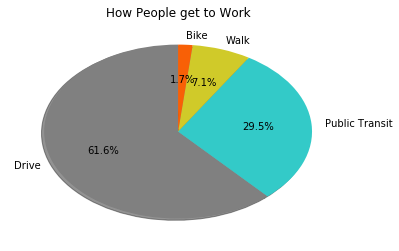

In [44]:
labels = ["Drive", "Public Transit", "Walk", "Bike"]
sizes = [731769, 350450, 84420, 20587]

# The colors of each section of the pie chart
colors = ["grey", "#33CAC8", "#D0CA29", "#F86006" ]


plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("How People get to Work")
#plt.savefig("%transit.png")